In [2]:
#Model

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict




hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()

dms = pd.get_dummies(df[['League','Division','NewLeague']])

ms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
x_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")
x = pd.concat([x_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


In [3]:
from sklearn.linear_model import Ridge

In [4]:
ridge_model = Ridge(alpha=0.1).fit(x_train,y_train)

In [5]:
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [6]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

Text(0.5, 1.0, 'Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Kaysayıları')

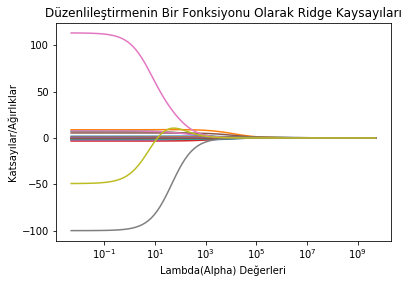

In [7]:
import matplotlib.pyplot as plt

lambdalar = 10**np.linspace(10,-2,100)*0.5

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(x_train,y_train)
    katsayilar.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale('log')

plt.xlabel("Lambda(Alpha) Değerleri")
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title("Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Kaysayıları")


In [8]:
#Tahmin

y_pred = ridge_model.predict(x_test)

np.sqrt(mean_squared_error(y_test,y_pred))

357.05179222828434

In [9]:
#Model Tuning

from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas = lambdalar,scoring="neg_mean_squared_error",normalize=True)

In [10]:
ridge_cv.fit(x_train,y_train)

RidgeCV(alphas=array([5.00000e+09, 3.78232e+09, ..., 6.60971e-03, 5.00000e-03]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [11]:
ridge_cv.alpha_

0.7599555414764666

In [12]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_,
                    normalize=True).fit(x_train,y_train)

In [13]:
np.sqrt(mean_squared_error(y_test,ridge_tuned.predict(x_test)))

386.6826429756415